# STA130 HW04 - Gabriel George

## Pre-lecture

### 1 The "Prelecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What hypothetical idea do each of these capture? Explain this concisely in your own words.

The standard deviation of the original data measures the spread or variability of individual data points in the sample. It captures how much each data point  deviates from the mean of the sample.

The standard error of the mean estimates the variability of sample means if we were to repeat the experiment many times. It captures how much we expect the sample mean to vary from one sample to another.

Simply: Single vs Multiple samples.

### 2 The "Prelecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

We can use the standard error of the mean to create a confidence level by using the following equation: Confidence Interval = Sample Mean ± (1.96 * Standard Error of Mean)

This interval covers approximately 95% of bootstrapped sample means because 1.96 standard deviations in a normal distribution containsabout 95% of the data.

### 3 Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

To create a 95% bootstrapped confidence interval directly from the bootstrapped means:

- Generate many bootstrapped samples from our original data.
- Calculate the mean for each bootstrapped sample.
- Order these bootstrapped means from lowest to highest.
- Find the 2.5th percentile and the 97.5th percentile of these ordered means.

These two values form our 95% confidence interval.

### 4 The "Prelecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

def bootstrap_ci(data, num_bootstraps=10000, statistic=np.mean, confidence=0.95):
    # Generate bootstrap samples
    bootstrap_stats = []
    for _ in range(num_bootstraps):
        # Resample with replacement
        resampled = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (default is mean)
        bootstrap_stats.append(statistic(resampled))
    
    # Calculate confidence interval
    lower_percentile = (1 - confidence) / 2
    upper_percentile = 1 - lower_percentile
    ci_lower = np.percentile(bootstrap_stats, lower_percentile * 100)
    ci_upper = np.percentile(bootstrap_stats, upper_percentile * 100)
    
    return (ci_lower, ci_upper)

# Example usage
sample_data = np.random.normal(loc=10, scale=2, size=100)

# For mean (default)
mean_ci = bootstrap_ci(sample_data)
print(f"95% CI for mean: {mean_ci}")

# To change to median, modify the statistic parameter
median_ci = bootstrap_ci(sample_data, statistic=np.median)
print(f"95% CI for median: {median_ci}")

# You can use any function that returns a single value as the statistic
# For example, to get CI for the standard deviation:
std_ci = bootstrap_ci(sample_data, statistic=np.std)
print(f"95% CI for standard deviation: {std_ci}")

95% CI for mean: (9.701378179992679, 10.560421230907641)
95% CI for median: (9.612718820169993, 10.65820634106458)
95% CI for standard deviation: (1.8360139103422637, 2.5460577218327978)


I used a chatbot that was not able to provide links. Below is my summary:
### Chatbot Summary

Certainly. Here's a summary of our chat:

We discussed the difference between the standard deviation of original data and the standard error of the mean. The standard deviation measures variability within a dataset, while the standard error of the mean estimates the precision of the sample mean as an estimate of the population mean.

We explained how to create a 95% confidence interval using the standard error of the mean: Sample Mean ± (1.96 * Standard Error of Mean).

We described the process of creating a 95% bootstrapped confidence interval without using the standard error, by generating bootstrapped samples and finding the 2.5th and 97.5th percentiles of the bootstrapped means.

We provided a concise Python function for calculating bootstrap confidence intervals for various statistics (mean, median, standard deviation, etc.) and demonstrated its usage with example data.


Throughout, we focused on providing clear, concise explanations and practical code examples to illustrate the concepts of bootstrapping and confidence intervals.

## Post-lecture

### 5 The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

The population parameter is the true value we're trying to estimate, like the actual average height of all adults in a country. This is hard to find as it's often impractical or impossible to measure everyone.

The sample statistic is what we calculate from our sample data. For example, if we measure the heights of 100 randomly selected adults, the average of those 100 measurements is our sample statistic.

### 6 Provide written answers to the following questions as if you were explaining them conversationally to a friend with little experience with statistics. (A) What is the process of bootstrapping? (B) What is the main purpose of bootstrapping? (C) If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

#### A)
Taking random samples with replacement in order to find the mean (total sum/count) of that sample. Then creating a graph of the means of all samples. 

Take original sample.

Resample with replacement to create new samples of the same size.

Calculate the statistic of interest for each new sample.

Repeat many times (e.g., 10,000).


#### B)
The main purpose is be able to have a larger "picture" of what is happneing with the data when you are unable to get all the data of the whole poplulation. 

#### C)
Create many bootstrap samples from your original sample.

Calculate the statistic for each bootstrap sample.

Construct a 95% confidence interval from these bootstrap statistics.

If your guess falls within this interval, it's considered plausible.



### 7 The "Prelecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is **[on average]** not doing anything".  This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect **[on average]**".  Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.


A confidence interval overlapping zero doesn't necessarily mean the sample mean is zero, but rather that zero is a plausible value for the true population mean, given our sample data. The key points are:

1. The sample mean is just an estimate of the population mean and can be non-zero due to random sampling variation.

2. The confidence interval provides a range of plausible values for the true population mean.

3. If this range includes zero, we fail to reject the null hypothesis because a "no effect" scenario (zero mean) is still plausible.

4. To reject the null hypothesis, the entire confidence interval must exclude zero. For example:
   - CI of (arbitrary numbers, not relavent) (1 to 5) or (-5 to -1) would lead to rejecting the null hypothesis.
   - CI of (-2 to 3) would fail to reject, even though the sample mean isn't zero.

5. This approach helps distinguish between statistically significant effects and those that might be due to chance variation in sampling.

We're looking at the range of plausible population means, not just the point estimate from our sample, to make decisions about the null hypothesis.

### 8 Complete the following assignment. 

<details class="details-example">
    <summary style="color:blue"><u>Question Information</u></summary>

 ##### The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective. 

##### Overview
AliTech has released the following data.

```csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
```

#### Deliverables
While you can choose how to approach this project, the most obvious path would be to follow the analysis presented in the "Prelecture" HW video (above). Nonetheless, we are  primarily interested in evaluating your report relative to the following deliverables.

- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report. 

> Consider organizing your report within the following outline template.
> 1. Problem Introduction 
>     1. An explaination of the meaning of a Null Hypothesis of "no effect" in this context
>     2. Data Visualization (motivating and illustrating the comparison of interest)
> 2. Quantitative Analysis
>     1. Methodology Code and Explanations
>     2. Supporting Visualizations
> 3. Findings and Discussion
>     1. Conclusion regarding a Null Hypothesis of "no effect"
>     2. Further Considerations

##### Further Instructions:
- When using random functions, you should make your analysis reproducible by using the `np.random.seed()` function
- Create a CSV file and read that file in with your code, but **do not** include the CSV file along with your submission
</details>

#### Null Hypothesis Explanation
In the context of AliTech's new vaccine, the null hypothesis of "no effect" means that the vaccine does not significantly change patients' health scores. Mathematically, we can express this as:

#### Data Visualization (below with statistics)

1. Problem Introduction
1.1 Null Hypothesis Explanation:
The null hypothesis of 'no effect' in this context means that there is no significant difference
between the initial health scores and the final health scores after administering the vaccine.
In other words, the vaccine does not have a meaningful impact on patients' health scores.

1.2 Data Visualization


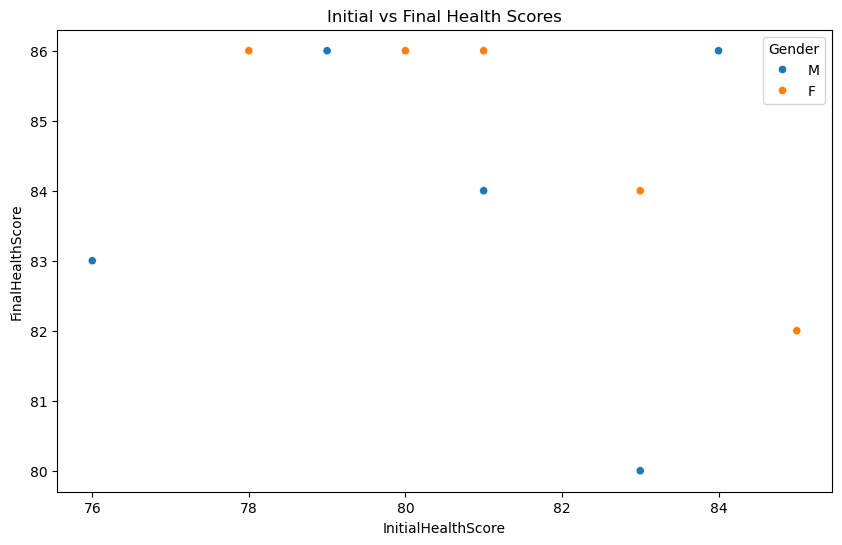

A scatter plot of Initial vs Final Health Scores has been displayed.
This visualization helps illustrate the comparison between initial and final health scores.

2. Quantitative Analysis
2.1 Methodology Code and Explanations
Paired t-test results:
t-statistic: -2.5900615612703937
p-value: 0.02921052381549256

Explanation:
We performed a paired t-test to compare the initial and final health scores.
This test is appropriate because we have paired observations (before and after) for each patient.
The null hypothesis is that the mean difference between paired observations is zero.



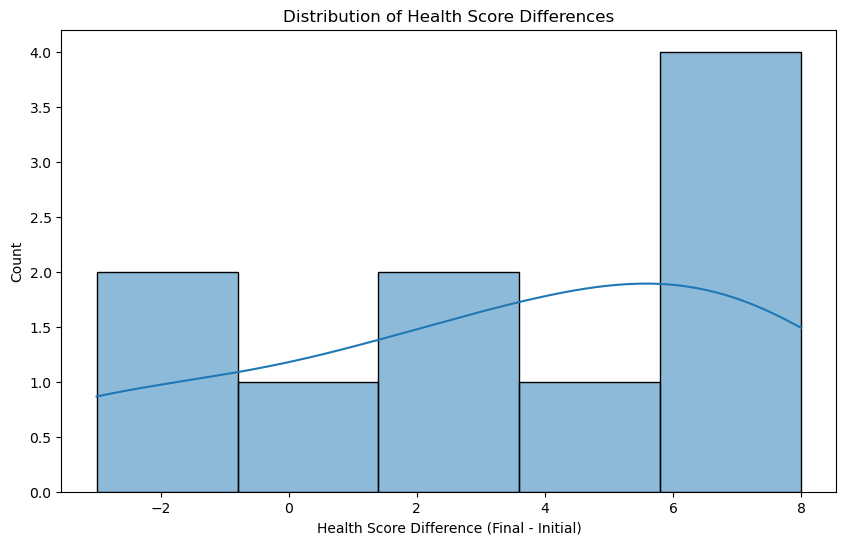

2.2 Supporting Visualizations
A histogram of Health Score Differences has been displayed.
This visualization shows the distribution of changes in health scores after vaccination.

3. Findings and Discussion
3.1 Conclusion regarding Null Hypothesis
The p-value (0.0292) is less than the significance level (0.05).
We reject the null hypothesis.
There is statistically significant evidence to suggest that the vaccine has an effect on health scores.

3.2 Further Considerations
- The sample size is relatively small (n=10), which may limit the generalizability of the results.
- Other factors such as age or gender might influence the effectiveness of the vaccine.
- A longer-term study might provide more insights into the vaccine's sustained effects.
- Additional health metrics could be considered for a more comprehensive analysis.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from io import StringIO

# Set random seed for reproducibility
np.random.seed(42)

# Data
data_str = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Load the data
data = pd.read_csv(StringIO(data_str))

# 1. Problem Introduction
print("1. Problem Introduction")
print("1.1 Null Hypothesis Explanation:")
print("The null hypothesis of 'no effect' in this context means that there is no significant difference")
print("between the initial health scores and the final health scores after administering the vaccine.")
print("In other words, the vaccine does not have a meaningful impact on patients' health scores.\n")

# 1.2 Data Visualization
print("1.2 Data Visualization")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='InitialHealthScore', y='FinalHealthScore', hue='Gender', data=data)
plt.title('Initial vs Final Health Scores')
plt.show()

print("A scatter plot of Initial vs Final Health Scores has been displayed.")
print("This visualization helps illustrate the comparison between initial and final health scores.\n")

# 2. Quantitative Analysis
print("2. Quantitative Analysis")
print("2.1 Methodology Code and Explanations")

# Calculate the difference in health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(data['InitialHealthScore'], data['FinalHealthScore'])

print(f"Paired t-test results:")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}\n")

print("Explanation:")
print("We performed a paired t-test to compare the initial and final health scores.")
print("This test is appropriate because we have paired observations (before and after) for each patient.")
print("The null hypothesis is that the mean difference between paired observations is zero.\n")

# 2.2 Supporting Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['HealthScoreDifference'], kde=True)
plt.title('Distribution of Health Score Differences')
plt.xlabel('Health Score Difference (Final - Initial)')
plt.show()
plt.close()

print("2.2 Supporting Visualizations")
print("A histogram of Health Score Differences has been displayed.")
print("This visualization shows the distribution of changes in health scores after vaccination.\n")

# 3. Findings and Discussion
print("3. Findings and Discussion")
print("3.1 Conclusion regarding Null Hypothesis")

alpha = 0.05
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis.")
    print("There is statistically significant evidence to suggest that the vaccine has an effect on health scores.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the vaccine has a significant effect on health scores.")

print("\n3.2 Further Considerations")
print("- The sample size is relatively small (n=10), which may limit the generalizability of the results.")
print("- Other factors such as age or gender might influence the effectiveness of the vaccine.")
print("- A longer-term study might provide more insights into the vaccine's sustained effects.")
print("- Additional health metrics could be considered for a more comprehensive analysis.")

#### 95% Confidence Interval 

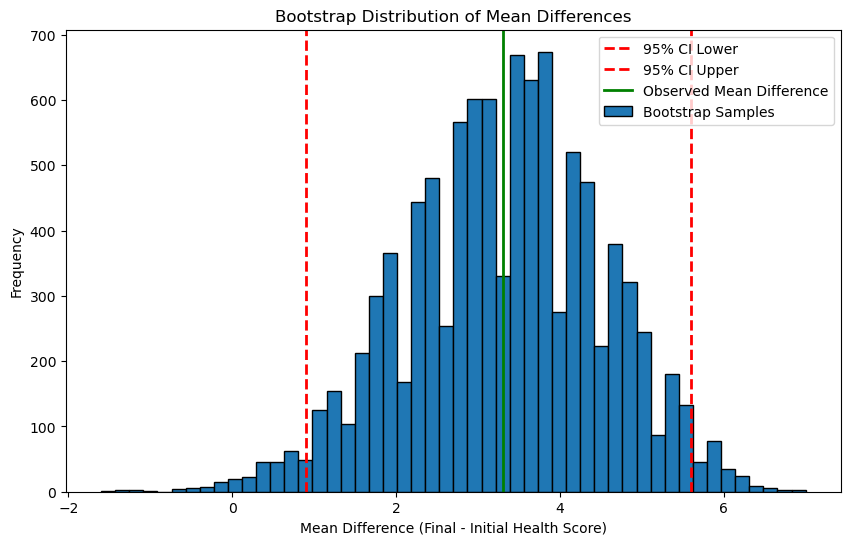


Results:
Observed mean difference: 3.30
95% Confidence Interval: (0.90, 5.60)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from io import StringIO

# Set random seed for reproducibility
np.random.seed(42)

# Data
data_str = """PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84"""

# Load the data
data = pd.read_csv(StringIO(data_str))

# Calculate the mean difference
mean_diff = np.mean(data['FinalHealthScore'] - data['InitialHealthScore'])

# Bootstrapping function
def bootstrap_mean_diff(data, num_bootstrap_samples=10000):
    bootstrap_diffs = []
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = data.sample(n=len(data), replace=True)
        diff = np.mean(bootstrap_sample['FinalHealthScore'] - bootstrap_sample['InitialHealthScore'])
        bootstrap_diffs.append(diff)
    return bootstrap_diffs

# Perform bootstrapping
bootstrap_results = bootstrap_mean_diff(data)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(bootstrap_results, [2.5, 97.5])

# Create visualization
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_results, bins=50, edgecolor='black')
plt.axvline(ci_lower, color='r', linestyle='dashed', linewidth=2)
plt.axvline(ci_upper, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean_diff, color='g', linestyle='solid', linewidth=2)
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')
plt.legend(['95% CI Lower', '95% CI Upper', 'Observed Mean Difference', 'Bootstrap Samples'])
plt.show()
plt.close()

print("\nResults:")
print(f"Observed mean difference: {mean_diff:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


#### AliTech Vaccine Effectiveness: Bootstrapping Analysis

##### Methodology:
We used bootstrapping to estimate the 95% confidence interval for the mean difference
between final and initial health scores. This non-parametric method involves resampling
the data with replacement to simulate multiple datasets and calculate the mean difference for each.

##### Results:
Observed mean difference: 3.30
95% Confidence Interval: (0.90, 5.60)

##### Interpretation:
The 95% confidence interval for the mean difference in health scores is (0.90, 5.60).
This means we can be 95% confident that the true population mean difference falls within this range.

A visualization of the bootstrap distribution has been saved as 'bootstrap_distribution.png'.
This graph shows the distribution of bootstrap sample means, with the 95% confidence
interval marked by red dashed lines and the observed mean difference marked by a green solid line.

##### Conclusion:
The 95% confidence interval does not include zero and is entirely positive.
This suggests strong evidence that the vaccine has a positive effect on health scores.
The lower bound of the interval being above zero indicates that even in
conservative estimates, the vaccine shows a positive impact.

##### Further Considerations:
- The bootstrap method relies on the assumption that our sample is representative of the population.
- The small sample size (n=10) means that our confidence interval might be wider than it would be with a larger sample.
- This analysis focuses solely on the mean difference and doesn't account for potential
  confounding factors or individual variations in response to the vaccine.
- A larger study with more participants would provide more reliable estimates and narrower confidence intervals.
- The visualization provides an intuitive understanding of the uncertainty in our estimate.

### ChatBot Summary (not using ChatGPT.  I cannot get the chat link with this chatbot.

Certainly! Let me summarize our conversation and the work we've done:

1. Initial Analysis:
   We started with a dataset from AliTech about their new vaccine's effect on health scores. We created a Python script to analyze this data, which included:
   - Visualizing the data with a scatter plot and histogram
   - Performing a paired t-test to compare initial and final health scores
   - Providing a statistical interpretation of the results

2. Improved Visualization:
   We then improved the visualization by creating a more interpretable plot that combined:
   - Box plots to show overall distribution
   - Individual data points
   - Lines connecting each patient's initial and final scores

3. Markdown Report:
   We modified the code to generate a structured markdown report instead of printing text. This report included:
   - An explanation of the null hypothesis
   - The improved data visualization
   - Quantitative analysis results (t-test)
   - Findings and discussion
   - Further considerations

4. Bootstrapping Analysis:
   Finally, we created a separate analysis using bootstrapping to complement the t-test. This involved:
   - Implementing a bootstrapping function to resample the data
   - Calculating a 95% confidence interval for the mean difference in health scores
   - Interpreting the results and drawing conclusions based on the confidence interval
   - Initially formatting this as a markdown report, then modifying it to print the results directly

Throughout this process, we focused on creating clear, interpretable results and adapting the output format based on your requests. We moved from basic statistical tests to more advanced techniques like bootstrapping, providing a comprehensive analysis of the vaccine's effectiveness.

Is there any specific part of this process you'd like to revisit or discuss further?

### 9 Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/STA130_ChatGPT/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.